In [3]:
import pandas as pd


#Data Cleaning

In [166]:
df = pd.read_csv('zameen.csv')
print(df.head())

   property_id  location_id  \
0       237062         3325   
1       346905         3236   
2       386513          764   
3       656161          340   
4       841645         3226   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   

      location       city      province_name   latitude  longitude  baths  \
0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
2         G-15  Islamabad  Islamabad Capital  33.631486  72.926559      6   
3    Bani Gala  Islamaba

In [114]:
df.isnull().sum()

,0
property_id,0
location_id,0
page_url,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0
longitude,0


In [167]:
df['agency'].fillna('Unknown Agency', inplace=True)
df['agent'].fillna('Unknown Agent', inplace=True)
#agency and agents had null values so i filled in those missing values with sample field

/tmp/ipython-input-1642640718.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agency'].fillna('Unknown Agency', inplace=True)
/tmp/ipython-input-1642640718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [168]:
df['Area Size'] = pd.to_numeric(df['Area Size'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
#ensuring of all float values

In [117]:
print(df['baths'].value_counts().sort_index())

baths
0      42382
1       5356
2      25754
3      34603
4      19407
5      15303
6      16648
7       5385
8       2035
9        696
10       855
11         5
12        10
13         3
14         3
403        1
Name: count, dtype: int64


In [169]:
df = df[(df['baths'] >= 0) & (df['baths'] <= 8)]
#Max is 11 baths so applying range from 0 - 11

In [170]:
print(df['area'].value_counts().sort_index())


area
0 Marla       12
0.1 Marla      5
0.2 Marla      5
0.3 Marla      1
0.4 Marla     30
            ... 
9.7 Kanal      3
9.7 Marla     38
9.8 Marla    421
9.9 Marla     12
90 Kanal       3
Name: count, Length: 342, dtype: int64


In [171]:
df = df[df['Area Size'] > 0]
#0 marla or 0 kanal size are not possible

In [172]:
df['date_added'] = pd.to_datetime(df['date_added'], dayfirst=True, errors='coerce')
df['date_added'] = df['date_added'].dt.strftime('%Y-%m-%d')
#formatting the date in Y-M-D format


In [173]:
df['date_added'].isnull().sum()
df = df.dropna(subset=['date_added'])  # or fill with a default year

In [123]:
df['property_id'].duplicated().sum()
#Can't repeat as unique for every property as there is no duplicates so need to remove

np.int64(0)

In [124]:
df['location_id'].duplicated().sum()
#can repeat

np.int64(84620)

#Data Exploration

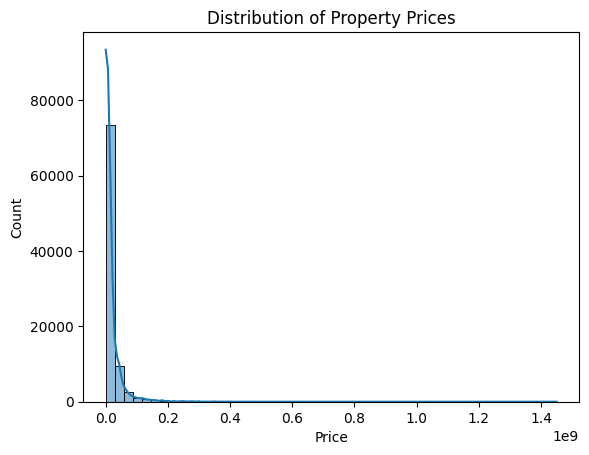

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


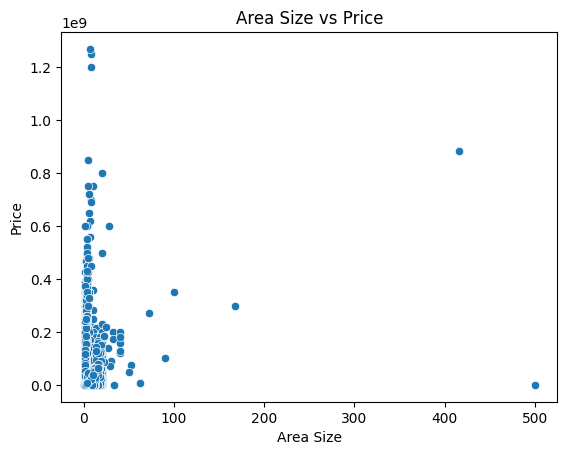

In [17]:
sns.scatterplot(data=df, x='Area Size', y='price')
plt.title('Area Size vs Price')
plt.xlabel('Area Size')
plt.ylabel('Price')
plt.show()


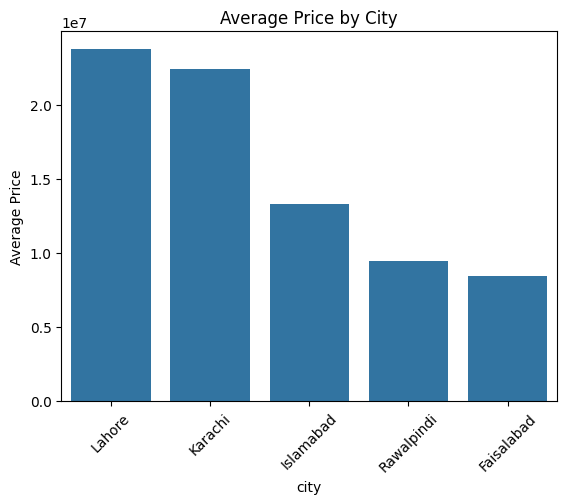

In [18]:
city_price = df.groupby('city')['price'].mean().sort_values(ascending=False)

sns.barplot(x=city_price.index, y=city_price.values)
plt.xticks(rotation=45)
plt.title('Average Price by City')
plt.ylabel('Average Price')
plt.show()


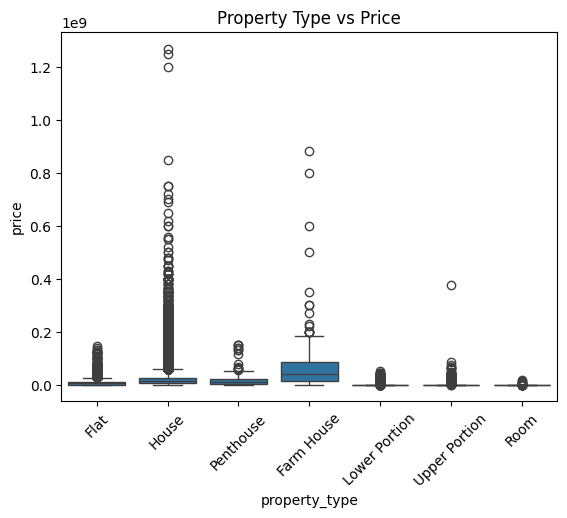

In [19]:
sns.boxplot(data=df, x='property_type', y='price')
plt.xticks(rotation=45)
plt.title('Property Type vs Price')
plt.show()


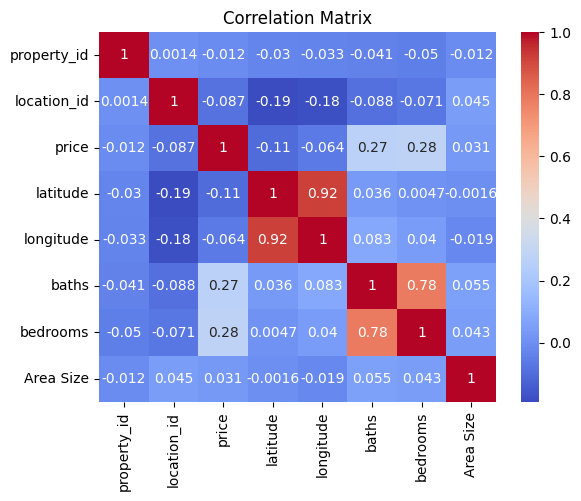

In [20]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Feature Engineering

In [174]:
from datetime import datetime
import numpy as np
df['listing_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['property_age'] = datetime.now().year - df['listing_year']
#age of property
df['bed_per_bath'] = df['bedrooms'] / df['baths']
df['bed_per_bath'].replace([np.inf, -np.inf], np.nan, inplace=True)
#bed per bath
df['price_per_unit'] = df['price'] / df['Area Size']
#price per marla or kanal

/tmp/ipython-input-1581887364.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bed_per_bath'].replace([np.inf, -np.inf], np.nan, inplace=True)


#Encoding

In [45]:
print(df.head())

   property_id  location_id  \
0       237062         3325   
1       346905         3236   
3       656161          340   
4       841645         3226   
5       850762         3390   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   
5  https://www.zameen.com/Property/ghauri_town_gh...         House  34500000   

      location       city      province_name   latitude  longitude  baths  \
0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
3    Bani Gala  Islamabad  Islamabad Capital  33.707573  73.151199      4   
4  DHA Defence  Islamaba

In [175]:
df.drop(['property_id', 'agent', 'agency', 'page_url'], axis=1, inplace=True)
#dropping unneccessary cols

In [176]:
df = pd.get_dummies(df, columns=['property_type', 'purpose', 'province_name'], drop_first=True)
#one hot encoding as they are not unique mostly similar and will help determine us where the bulk of propertie are bought in

In [177]:
import pickle
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['city', 'area', 'date_added', 'Area Type','location','Area Category']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Save the encoders
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)


#Outlier Analysis

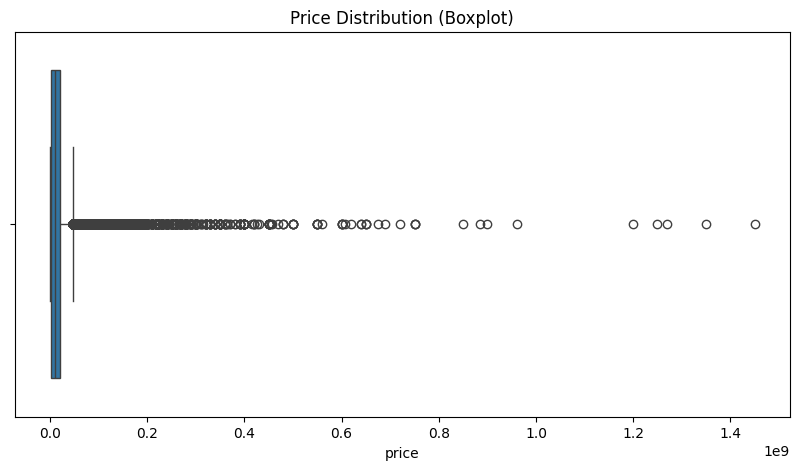

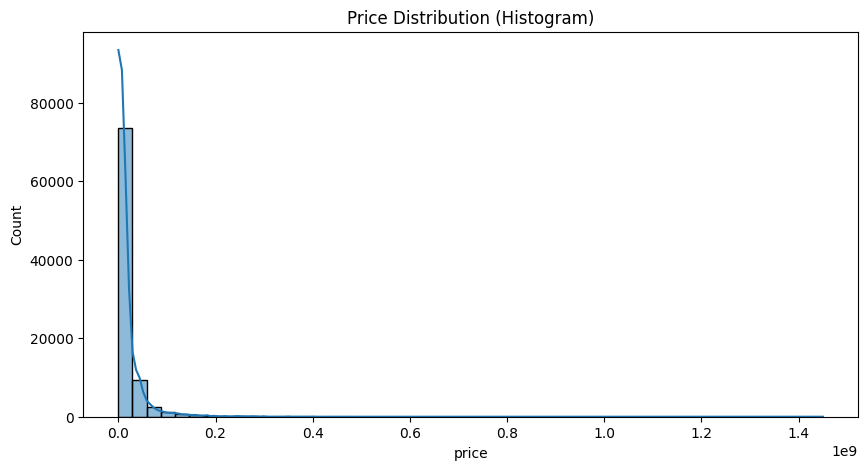

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title("Price Distribution (Boxplot)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution (Histogram)")
plt.show()


In [131]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Total outliers detected: {len(outliers)}")


Total outliers detected: 7578


In [51]:
# Compare outliers with non-outliers
compare = df.copy()
compare['is_outlier'] = (df['price'] < lower_bound) | (df['price'] > upper_bound)

# See average values by outlier status
print(compare.groupby('is_outlier')[['bedrooms', 'baths', 'Area Size']].mean())


            bedrooms     baths  Area Size
is_outlier                               
False       3.048967  2.771059   6.032063
True        4.784508  4.335313   4.442043


In [54]:
# Common locations for outliers
print(compare[compare['is_outlier']]['location'].value_counts().head())

# See a few example rows
print(outliers[['price', 'bedrooms', 'baths', 'Area Size', 'location', 'Area Type']].head())


location
311    3341
238     310
499     231
933     196
840     183
Name: count, dtype: int64
        price  bedrooms  baths  Area Size  location Area Type
11   48000000         2      2        7.8       355     Marla
12  400000000         0      0        4.5       396     Kanal
22   88500000         3      3        6.0       187     Kanal
23   47000000         3      2        8.4       355     Marla
28  100000000         5      5       17.8       396     Marla


#Predictive Modeling

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train-test split
from sklearn.model_selection import train_test_split

# Drop non-numeric or unused columns (you can refine this based on your EDA)
features_to_drop = ['price', 'page_url', 'agency', 'agent', 'date_added']
X = df.drop(columns=features_to_drop, errors='ignore')
y = df['price']

# Handle categorical variables (simple label encoding or one-hot if needed)
X = pd.get_dummies(X)

# Save feature columns to use during prediction
feature_columns = X.columns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [210]:
from sklearn.metrics import mean_squared_error, r2_score

models = {'Linear Regression': lr, 'Random Forest': rf, 'Gradient Boosting': gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")


Linear Regression - MSE: 366406224596476.38, R²: 0.66
Random Forest - MSE: 24694852601402.35, R²: 0.98
Gradient Boosting - MSE: 24480205004085.32, R²: 0.98


In [211]:
import pickle

# Save one model (e.g., gradient boosting) and columns
with open("model.pkl", "wb") as f:
    pickle.dump(gb, f)

with open("features.pkl", "wb") as f:
    pickle.dump(feature_columns, f)


#Predicting Model

In [213]:
X = pd.get_dummies(X)
feature_columns = X.columns


In [214]:
import pickle
with open('features.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)


In [215]:
import pandas as pd
import pickle

# Load model and feature columns
with open("model.pkl", "rb") as f:
    model = pickle.load(f)
with open("features.pkl", "rb") as f:
    feature_columns = pickle.load(f)

# Example new input (use same columns as model expects)
new_data = {
    'location_id': 3325,
    'latitude': 33.679890,
    'longitude': 73.012640,
    'baths': 2,
    'bedrooms': 3,
    'Area Size': 5.0,
    'city_Islamabad': 1,
    'province_name_Islamabad Capital': 1,
    'property_type_House': 1,
    'purpose_For Sale': 1,
    # all other possible one-hot columns must be 0
}

# Create DataFrame
new_df = pd.DataFrame([new_data])

# Add missing columns
for col in feature_columns:
    if col not in new_df.columns:
        new_df[col] = 0

# Reorder to match model input
new_df = new_df[feature_columns]

# Predict
prediction = model.predict(new_df)
print("Predicted Price:", prediction[0])


Predicted Price: 48545.49603258987


#Model Performance

In [216]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 24480205004085.32
R² Score: 0.9771578441038915


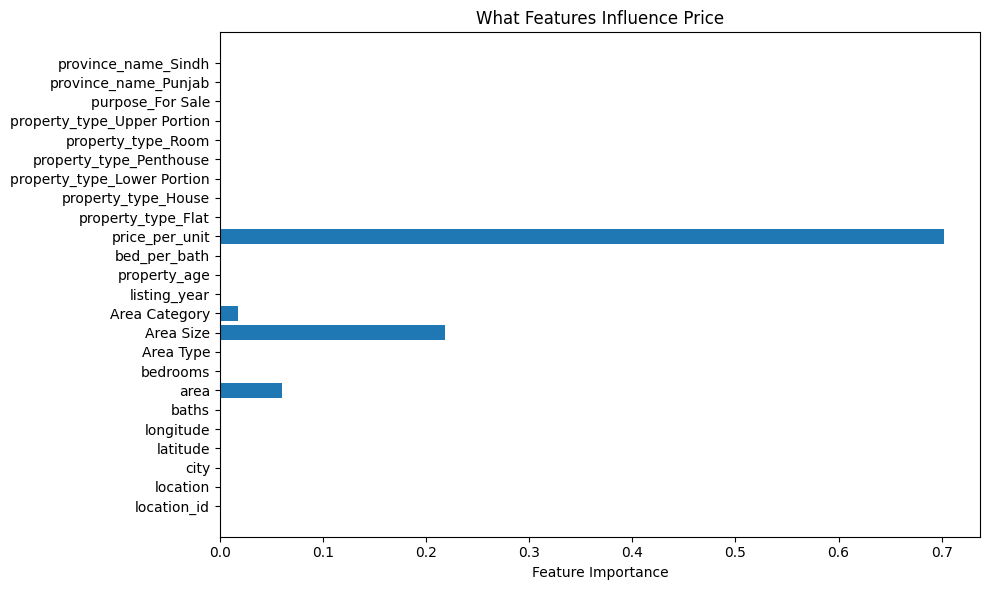

In [217]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = feature_columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("What Features Influence Price")
plt.tight_layout()
plt.show()


In [218]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("features.pkl", "wb") as f:
    pickle.dump(feature_columns, f)
